## Домашнее задание по теме "Функции потерь. Оптимизация"

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

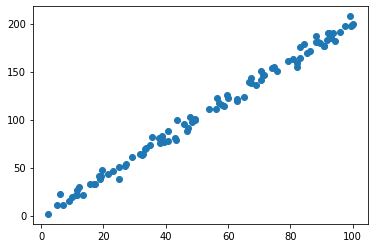

In [2]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

In [28]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [29]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [30]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [31]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [33]:
theta0 = 1
theta1 = 1
gamma = 0.9
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0054425385021308 t1: 1.3807483190494343 cost: 748.3492049723867
t0: 1.0088203036712857 t1: 1.617140170542379 cost: 295.3791646690156
t0: 1.0109161313574868 t1: 1.7639067019519876 cost: 120.77346125564137
t0: 1.0122160539139646 t1: 1.8550283555391327 cost: 53.46845436371875
t0: 1.0130218299384888 t1: 1.9116022672045538 cost: 27.524491068911146
t0: 1.0135208096161297 t1: 1.946726828658319 cost: 17.52390915840484
t0: 1.0138293113951609 t1: 1.9685343222252707 cost: 13.668999306886294
t0: 1.0140195528792297 t1: 1.9820737659279886 cost: 12.183052735255462
t0: 1.0141363711715992 t1: 1.9904798988193042 cost: 11.610266997395637
t0: 1.0142076038870251 t1: 1.9956989585409537 cost: 11.389476039453859
t0: 1.01425053431856 t1: 1.9989392884013497 cost: 11.304367997937364
t0: 1.014275892991119 t1: 2.0009511017966757 cost: 11.271561453092612
t0: 1.0142903420705645 t1: 2.002200177066493 cost: 11.258915490187325
t0: 1.0142980178367442 t1: 2.002975697878686 cost: 11.254040797515287
t0: 1.01430148834

 ## Применим метод nesterov momentum

In [21]:
theta0 = 1
theta1 = 1
vt0 = 0  # экспоненциальные скользящие средние
vt1 = 0
gamma = 0.3 # коэффициент сохранения
lr = 0.0001
EPOCHS = 20

for i in range(EPOCHS):
    # градиент
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)

    # накапливаем градиент
    vt0 = gamma*vt0 + lr*dt0
    vt1 = gamma*vt1 + lr*dt1
    
    # новые значения параметров
    theta0 -= vt0
    theta1 -= vt1
    
    print('>%d theta0: %.5f, theta1: %.5f, cost: %.5f ' % (i, theta0, theta1, cost_function(X, Y, theta0, theta1)))

>0 theta0: 1.00544, theta1: 1.38075, cost: 748.34920 
>1 theta0: 1.01045, theta1: 1.73136, cost: 152.44024 
>2 theta0: 1.01343, theta1: 1.94001, cost: 19.07470 
>3 theta0: 1.01467, theta1: 2.02696, cost: 12.22903 
>4 theta0: 1.01492, theta1: 2.04443, cost: 14.31286 
>5 theta0: 1.01477, theta1: 2.03444, cost: 12.97930 
>6 theta0: 1.01456, theta1: 2.01999, cost: 11.72112 
>7 theta0: 1.01440, theta1: 2.00969, cost: 11.30716 
>8 theta0: 1.01433, theta1: 2.00453, cost: 11.25114 
>9 theta0: 1.01430, theta1: 2.00288, cost: 11.25453 
>10 theta0: 1.01429, theta1: 2.00290, cost: 11.25442 
>11 theta0: 1.01430, theta1: 2.00342, cost: 11.25229 
>12 theta0: 1.01430, theta1: 2.00389, cost: 11.25123 
>13 theta0: 1.01430, theta1: 2.00416, cost: 11.25100 
>14 theta0: 1.01429, theta1: 2.00428, cost: 11.25098 
>15 theta0: 1.01429, theta1: 2.00430, cost: 11.25099 
>16 theta0: 1.01428, theta1: 2.00429, cost: 11.25099 
>17 theta0: 1.01428, theta1: 2.00427, cost: 11.25098 
>18 theta0: 1.01427, theta1: 2.00425

In [24]:
# Наблюдаем, что метод с накоплением импульса Нестерова (при условии корректного подбора гиперпараметров) 
#сошёлся на несколько итераций быстрее обычного градиентного спуска.

## Применим метод #RMSprop

In [25]:
# rmsprop
theta0 = 1
theta1 = 1
eg0 = 0  # бегущие средние квадратов градиента
eg1 = 0
gamma = 0.3 # коэффициент сохранения
lr = 0.01
eps = 10e-6

EPOCHS = 200

for i in range(EPOCHS):
    # градиент
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)

    # в данном методе используем квадраты градиента
    eg0 = gamma*eg0 + (1-gamma)*dt0*dt0
    eg1 = gamma*eg1 + (1-gamma)*dt1*dt1
    
    # новые значения параметров
    theta0 -= (lr * dt0)/(np.sqrt(eg0 + eps))
    theta1 -= (lr * dt1)/(np.sqrt(eg1 + eps))
    
    print('>%d theta0: %.5f, theta1: %.5f, cost: %.5f ' % (i, theta0, theta1, cost_function(X, Y, theta0, theta1)))

>0 theta0: 1.01195, theta1: 1.01195, cost: 1877.58458 
>1 theta0: 1.02241, theta1: 1.02241, cost: 1837.91548 
>2 theta0: 1.03250, theta1: 1.03250, cost: 1799.99584 
>3 theta0: 1.04250, theta1: 1.04250, cost: 1762.84664 
>4 theta0: 1.05247, theta1: 1.05247, cost: 1726.19814 
>5 theta0: 1.06243, theta1: 1.06243, cost: 1689.97140 
>6 theta0: 1.07238, theta1: 1.07238, cost: 1654.14290 
>7 theta0: 1.08234, theta1: 1.08234, cost: 1618.70561 
>8 theta0: 1.09229, theta1: 1.09229, cost: 1583.65737 
>9 theta0: 1.10224, theta1: 1.10224, cost: 1548.99755 
>10 theta0: 1.11219, theta1: 1.11219, cost: 1514.72594 
>11 theta0: 1.12214, theta1: 1.12215, cost: 1480.84245 
>12 theta0: 1.13209, theta1: 1.13210, cost: 1447.34704 
>13 theta0: 1.14204, theta1: 1.14205, cost: 1414.23970 
>14 theta0: 1.15199, theta1: 1.15200, cost: 1381.52039 
>15 theta0: 1.16194, theta1: 1.16195, cost: 1349.18909 
>16 theta0: 1.17189, theta1: 1.17189, cost: 1317.24577 
>17 theta0: 1.18184, theta1: 1.18184, cost: 1285.69042 
>1

>183 theta0: 1.63030, theta1: 2.00044, cost: 11.36208 
>184 theta0: 1.61900, theta1: 1.99049, cost: 11.36218 
>185 theta0: 1.62359, theta1: 2.00054, cost: 11.36095 
>186 theta0: 1.61230, theta1: 1.99058, cost: 11.36104 
>187 theta0: 1.61696, theta1: 2.00063, cost: 11.35983 
>188 theta0: 1.60566, theta1: 1.99068, cost: 11.35992 
>189 theta0: 1.61039, theta1: 2.00073, cost: 11.35874 
>190 theta0: 1.59909, theta1: 1.99077, cost: 11.35882 
>191 theta0: 1.60388, theta1: 2.00082, cost: 11.35766 
>192 theta0: 1.59259, theta1: 1.99087, cost: 11.35775 
>193 theta0: 1.59745, theta1: 2.00091, cost: 11.35661 
>194 theta0: 1.58616, theta1: 1.99096, cost: 11.35669 
>195 theta0: 1.59108, theta1: 2.00100, cost: 11.35558 
>196 theta0: 1.57980, theta1: 1.99105, cost: 11.35565 
>197 theta0: 1.58478, theta1: 2.00110, cost: 11.35456 
>198 theta0: 1.57350, theta1: 1.99114, cost: 11.35464 
>199 theta0: 1.57854, theta1: 2.00119, cost: 11.35357 
